In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.datasets import cifar100
from sklearn.metrics import accuracy_score
from keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization
from keras.regularizers import l2
from keras.applications import VGG16

In [2]:
num_classes = 100

In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [4]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
def get_accuracy_score(predictions, y_test):
    pred_labels = []
    y_labels = []

    for p in predictions:
        pred_labels.append(np.argmax(p))

    for y in y_test:
        y_labels.append(np.argmax(y))

    return(accuracy_score(y_labels, pred_labels))

Building baseline model

In [7]:
inp_shape = (32,32,3)
decay = 0.0005

In [8]:
input_ = Input(shape = inp_shape)

In [9]:
conv1 = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(decay))(input_)
conv1 = BatchNormalization()(conv1)
conv1 = Dropout(0.3)(conv1)

conv1 = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(decay))(conv1)
conv1 = BatchNormalization()(conv1)

maxpool1 = MaxPool2D(pool_size=(2,2))(conv1)

conv2 = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(decay))(maxpool1)
conv2 = BatchNormalization()(conv2)
conv2 = Dropout(0.4)(conv2)

conv2 = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(decay))(conv2)
conv2 = BatchNormalization()(conv2)

maxpool2 = MaxPool2D(pool_size=(2,2))(conv2)

conv3 = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(decay))(maxpool2)
conv3 = BatchNormalization()(conv3)
conv3 = Dropout(0.4)(conv3)

conv3 = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(decay))(conv3)
conv3 = BatchNormalization()(conv3)
conv3 = Dropout(0.4)(conv3)

conv3 = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(decay))(conv3)
conv3 = BatchNormalization()(conv3)

maxpool3 = MaxPool2D(pool_size=(2,2))(conv3)

conv4 = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(decay))(maxpool3)
conv4 = BatchNormalization()(conv4)
conv4 = Dropout(0.4)(conv4)

conv4 = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(decay))(conv4)
conv4 = BatchNormalization()(conv4)
conv4 = Dropout(0.4)(conv4)

conv4 = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(decay))(conv4)
conv4 = BatchNormalization()(conv4)

maxpool4 = MaxPool2D(pool_size=(2,2))(conv4)

conv5 = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(decay))(maxpool4)
conv5 = BatchNormalization()(conv5)
conv5 = Dropout(0.4)(conv5)

conv5 = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(decay))(conv5)
conv5 = BatchNormalization()(conv5)
conv5 = Dropout(0.4)(conv5)

conv5 = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(decay))(conv5)
conv5 = BatchNormalization()(conv5)

maxpool5 = MaxPool2D(pool_size=(2,2))(conv5)
maxpool5 = Dropout(0.5)(maxpool5)


l = Flatten()(maxpool5)

l = Dense(units = 512, activation='relu', kernel_regularizer=l2(decay))(l)
l = BatchNormalization()(l)
l = Dropout(0.5)(l)

output_ = Dense(units = num_classes, activation='softmax')(l)

In [10]:
model = Model(inputs = input_, outputs = output_)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                            

In [12]:
model.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'categorical_crossentropy')

In [13]:
history_vgg_scratch = model.fit(x = x_train, y = y_train, epochs = 10, validation_split=0.1, batch_size=128)

Epoch 1/10
352/352 [==============================] - 49s 88ms/step - loss: 7.0841 - accuracy: 0.0276 - val_loss: 6.7757 - val_accuracy: 0.0230
Epoch 2/10
352/352 [==============================] - 28s 80ms/step - loss: 6.0063 - accuracy: 0.0537 - val_loss: 5.8299 - val_accuracy: 0.0538
Epoch 3/10
352/352 [==============================] - 27s 78ms/step - loss: 5.3211 - accuracy: 0.0810 - val_loss: 5.2646 - val_accuracy: 0.0730
Epoch 4/10
352/352 [==============================] - 28s 80ms/step - loss: 4.8720 - accuracy: 0.1059 - val_loss: 4.8404 - val_accuracy: 0.0916
Epoch 5/10
352/352 [==============================] - 28s 80ms/step - loss: 4.4668 - accuracy: 0.1399 - val_loss: 4.4227 - val_accuracy: 0.1486
Epoch 6/10
352/352 [==============================] - 28s 79ms/step - loss: 4.2018 - accuracy: 0.1738 - val_loss: 4.9242 - val_accuracy: 0.1438
Epoch 7/10
352/352 [==============================] - 28s 79ms/step - loss: 4.0267 - accuracy: 0.2038 - val_loss: 4.5961 - val_accuracy:

In [14]:
with open('hisory_vgg_scratch.pkl', 'wb') as f:
    pickle.dump(history_vgg_scratch.history, f)
f.close()

In [15]:
file = open('hisory_vgg_scratch.pkl', 'rb')
history_vgg_scratch = pickle.load(file)
file.close()

In [16]:
vgg_scratch_predictions = model.predict(x_test)

313/313 [==============================] - 4s 9ms/step


In [17]:
with open('vgg_scratch_predictions.pkl', 'wb') as f:
    pickle.dump(vgg_scratch_predictions, f)
f.close()

In [18]:
file = open('vgg_scratch_predictions.pkl', 'rb')
vgg_scratch_predictions = pickle.load(file)
file.close()

In [19]:
print(get_accuracy_score(vgg_scratch_predictions, y_test))

0.2717


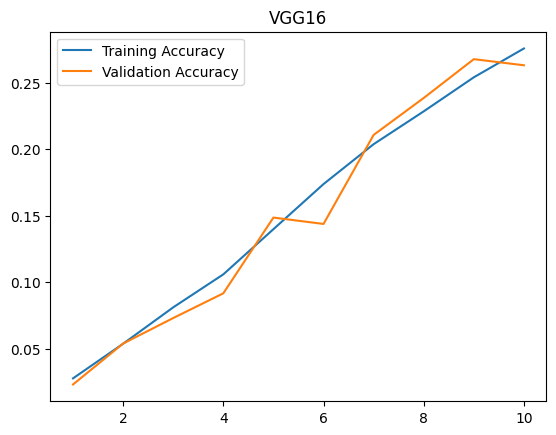

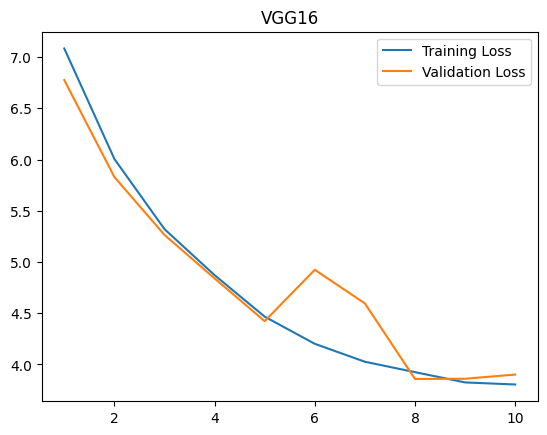

In [20]:
plt.plot(np.arange(1,11), history_vgg_scratch['accuracy'])
plt.plot(np.arange(1,11), history_vgg_scratch['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('VGG16')
plt.show()

plt.plot(np.arange(1,11), history_vgg_scratch['loss'])
plt.plot(np.arange(1,11), history_vgg_scratch['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('VGG16')
plt.show()